#### Prophet을 이용한 시계열 예측

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath = '/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/sales_data.csv'

In [6]:
import pandas as pd
sales = pd.read_csv(filepath, encoding = 'latin')

In [7]:
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


시계열 데이터로 변형

In [10]:
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'])

In [13]:
sales = sales.set_index('InvoiceDate')

In [14]:
sales

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France


#### sales 데이터의 총 가격을 예측
- 총 가격 = Quantity * UnitPrice

In [15]:
new_sales = sales[sales['UnitPrice'] > 0]
new_sales = sales[sales['Quantity'] > 0]

In [16]:
new_sales['Tot_price'] = new_sales['Quantity'] * new_sales['UnitPrice']

<ipython-input-16-caf6a807476d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_sales['Tot_price'] = new_sales['Quantity'] * new_sales['UnitPrice']


In [17]:
new_sales

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Tot_price
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60


- prophet은 두 가지 변수로만 가지고 시계열을 예측
- 일정한 시간 간격

In [20]:
pp_sales = new_sales.resample('D').sum() # 날짜 간격을 하루로 일정하게 변경

In [23]:
pp_sales.reset_index(drop = False, inplace = True) # 시계열 인덱스를 풀어주어야 함

In [25]:
pp_sales

,InvoiceDate,Quantity,UnitPrice,CustomerID,Tot_price
0,2010-12-01,27007,12806.18,30440752.0,58960.79
1,2010-12-02,31348,6609.15,32239487.0,47748.38
2,2010-12-03,16471,11055.94,16874267.0,46943.71
3,2010-12-04,0,0.00,0.0,0.00
4,2010-12-05,16451,7753.22,41173678.0,31774.95
...,...,...,...,...,...
369,2011-12-05,44664,26577.05,51394743.0,88741.96
370,2011-12-06,30469,9983.17,40277202.0,56713.21
371,2011-12-07,41980,8805.14,33524724.0,75439.16
372,2011-12-08,35672,21532.57,38282082.0,82495.00


In [27]:
pp_sales = pp_sales[['InvoiceDate', 'Tot_price']] # 설명변수와 종속변수 각각 하나씩 선정

In [28]:
pp_sales.rename(columns = {'InvoiceDate' : 'ds', 'Tot_price' : 'y'}, inplace = True)
# 설명변수를 ds, 종속변수를 y로 renaming 해주어야 함

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


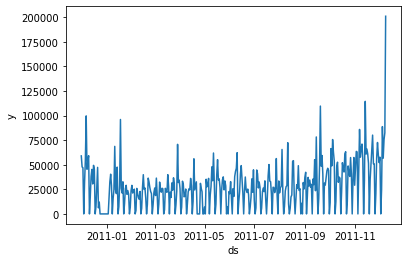

In [31]:
import seaborn as sns
sns.lineplot(data = pp_sales, x = 'ds', y = 'y') # trend를 보이기 위한 시계열 데이터 시각화

In [35]:
from sklearn.model_selection import train_test_split
train_input, test_input = train_test_split(pp_sales) # 훈련 데이터와 테스트 데이터로 나누어야 함

In [39]:
from prophet import Prophet

In [41]:
prophet = Prophet(daily_seasonality = True, 
                  growth = 'linear')
prophet.fit(train_input)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiufs10o/5qjsqmo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiufs10o/0rzkivh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96198', 'data', 'file=/tmp/tmpqiufs10o/5qjsqmo2.json', 'init=/tmp/tmpqiufs10o/0rzkivh6.json', 'output', 'file=/tmp/tmpqiufs10o/prophet_model8jldgn28/prophet_model-20230221065748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:57:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:57:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


- helper method 로 지정된 날짜 수 만큼 미래로 확장하는 데이터프레임 얻기

In [43]:
future = prophet.make_future_dataframe(periods = 30)  # 기존 데이터에 30일을 더 예측

In [47]:
future

,ds
0,2010-12-02
1,2010-12-03
2,2010-12-05
3,2010-12-06
4,2010-12-07
...,...
305,2012-01-04
306,2012-01-05
307,2012-01-06
308,2012-01-07


- predict 메서드는 각 컬럼을 yhat 이름에 예측된 값인 future안에 배치
- yhat을 포함한 component를 위한 컬럼과 confidence interval을 포함하는 새로운 데이터프레임 형성

In [48]:
forecast = prophet.predict(future)

In [49]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-02,42925.480666,15495.347813,56294.806975,42925.480666,42925.480666,-7085.856754,-7085.856754,-7085.856754,-19028.386344,-19028.386344,-19028.386344,11942.529589,11942.529589,11942.529589,0.0,0.0,0.0,35839.623912
1,2010-12-03,42912.464090,8532.488348,49069.057904,42912.464090,42912.464090,-13679.050863,-13679.050863,-13679.050863,-19028.386344,-19028.386344,-19028.386344,5349.335480,5349.335480,5349.335480,0.0,0.0,0.0,29233.413227
2,2010-12-05,42886.430938,-10377.167632,32481.074858,42886.430938,42886.430938,-31180.696538,-31180.696538,-31180.696538,-19028.386344,-19028.386344,-19028.386344,-12152.310195,-12152.310195,-12152.310195,0.0,0.0,0.0,11705.734400
3,2010-12-06,42873.414361,7925.328703,47435.220968,42873.414361,42873.414361,-14699.031402,-14699.031402,-14699.031402,-19028.386344,-19028.386344,-19028.386344,4329.354941,4329.354941,4329.354941,0.0,0.0,0.0,28174.382959
4,2010-12-07,42860.397785,18279.997508,58819.317755,42860.397785,42860.397785,-4387.497935,-4387.497935,-4387.497935,-19028.386344,-19028.386344,-19028.386344,14640.888408,14640.888408,14640.888408,0.0,0.0,0.0,38472.899850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2012-01-04,79728.948579,46523.264147,87126.171333,79430.450552,80009.678913,-13401.547450,-13401.547450,-13401.547450,-19028.386344,-19028.386344,-19028.386344,5626.838894,5626.838894,5626.838894,0.0,0.0,0.0,66327.401129
306,2012-01-05,79973.669639,53413.028971,93630.969727,79658.165477,80273.566731,-7085.856754,-7085.856754,-7085.856754,-19028.386344,-19028.386344,-19028.386344,11942.529589,11942.529589,11942.529589,0.0,0.0,0.0,72887.812885
307,2012-01-06,80218.390699,46384.341280,86646.308501,79886.418898,80539.642601,-13679.050863,-13679.050863,-13679.050863,-19028.386344,-19028.386344,-19028.386344,5349.335481,5349.335481,5349.335481,0.0,0.0,0.0,66539.339836
308,2012-01-07,80463.111759,10780.530594,53702.580303,80109.202892,80805.609061,-48765.023462,-48765.023462,-48765.023462,-19028.386344,-19028.386344,-19028.386344,-29736.637119,-29736.637119,-29736.637119,0.0,0.0,0.0,31698.088296


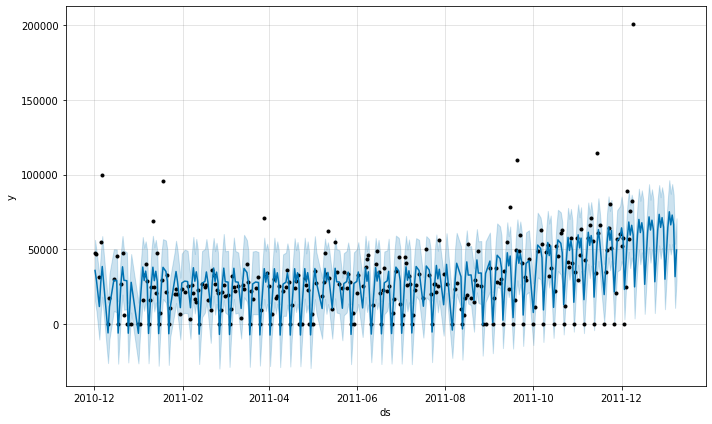

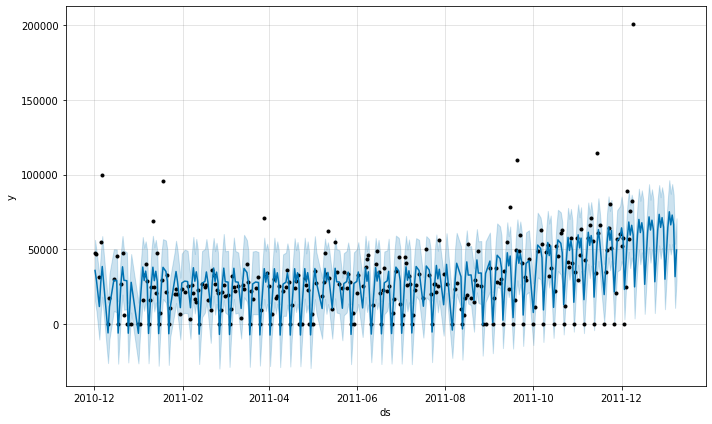

In [51]:
prophet.plot(forecast) # prophet.plot 메서드를 이용하여 예측값 시각화

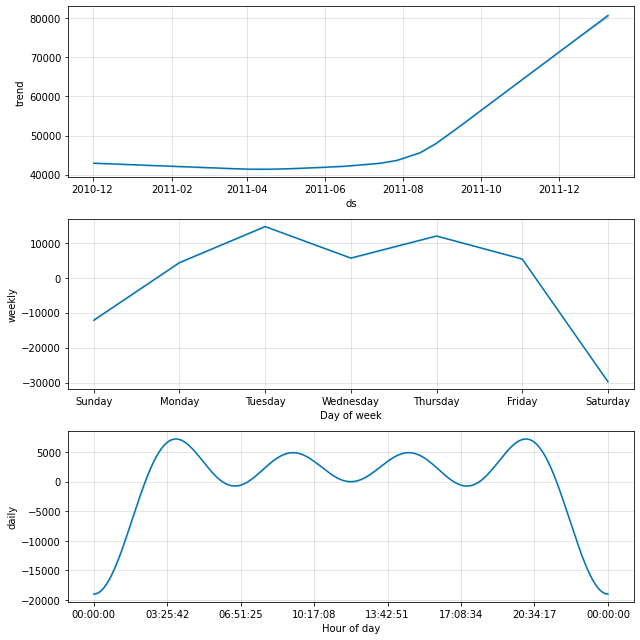

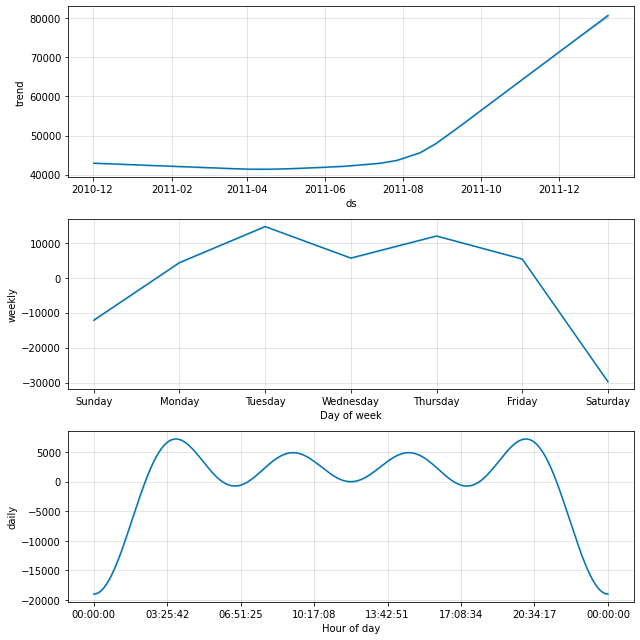

In [52]:
prophet.plot_components(forecast) # 예측 부분만 시각화
                                  # 연간 계절성과 주간 계절성 시계열 트렌드 확인